In [1]:
#imorting the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import LeakyReLU
from keras.preprocessing import image

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

from IPython.display import display
from PIL import Image

import numpy as np

import matplotlib.pyplot as plt
from matplotlib import pyplot

from sklearn.metrics import classification_report, confusion_matrix

Using TensorFlow backend.


In [2]:
#Initialize the CNN
classifier = Sequential()

#Step 1 - Convolution
classifier.add(Convolution2D(32, 3, 3, 
                             input_shape = (128, 128, 3)))
               
classifier.add(LeakyReLU(alpha=0.1))

#step 2 - pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

#2nd layer
classifier.add(Convolution2D(64, 3, 3))
classifier.add(LeakyReLU(alpha=0.1))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

#3rd layer
#classifier.add(Convolution2D(128, 3, 3))
#classifier.add(LeakyReLU(alpha=0.1))
#classifier.add(MaxPooling2D(pool_size=(2, 2)))

#step 3 - Flattening
classifier.add(Flatten())

#step 4 - Full Connection
classifier.add(Dense(output_dim = 128))

classifier.add(LeakyReLU(alpha=0.1))

classifier.add(Dense(output_dim = 26, 
                     activation = 'softmax'))

classifier.compile(optimizer = 'adam', 
                   loss = 'categorical_crossentropy', 
                   metrics = ['accuracy'])

#Fitting the CNN to the images
train_datagen = ImageDataGenerator(
        shear_range = 0.2,
        zoom_range = 0.2,
        rescale = 1./255,
        horizontal_flip = False)

test_datagen = ImageDataGenerator(
        rescale = 1./255)

W0724 21:24:06.090168 41896 deprecation_wrapper.py:119] From C:\Users\ASUS\Anaconda3\envs\deeplearning\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

C:\Users\ASUS\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(128, 128,...)`
  
W0724 21:24:06.251093 41896 deprecation_wrapper.py:119] From C:\Users\ASUS\Anaconda3\envs\deeplearning\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0724 21:24:06.283796 41896 deprecation_wrapper.py:119] From C:\Users\ASUS\Anaconda3\envs\deeplearning\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0724 21:24:06.304182 41896 deprecation_wrapper.py:119] 

In [3]:
training_set = train_datagen.flow_from_directory(
        'C:/Users/ASUS/Desktop/Research/Image Dataset/New Image Dataset/train_set2',
        target_size = (128, 128),
        batch_size = 32,
        class_mode = 'categorical')

test_set = train_datagen.flow_from_directory(
        'C:/Users/ASUS/Desktop/Research/Image Dataset/New Image Dataset/test_set2',
        target_size = (128, 128),
        batch_size = 32,
        class_mode = 'categorical')

Found 143 images belonging to 26 classes.
Found 53 images belonging to 26 classes.


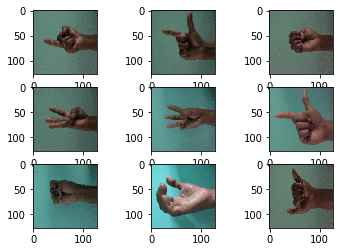

In [4]:
# generate samples and plot
for i in range(9):
    pyplot.subplot(330 + 1 + i)
    batch = training_set.next()
    image = batch[0]
    plt.imshow(image[1])

#show the figure
pyplot.show()

In [6]:
#Training the network

history = classifier.fit_generator(
        training_set,
        steps_per_epoch = 200,
        epochs = 10,
        validation_data = test_set,
        validation_steps = 20)

Epoch 1/10
200/200 [==============================] - 403s 2s/step - loss: 2.0091e-04 - acc: 1.0000 - val_loss: 0.8553 - val_acc: 0.8321
Epoch 2/10
200/200 [==============================] - 398s 2s/step - loss: 1.1988e-04 - acc: 1.0000 - val_loss: 0.7879 - val_acc: 0.8264
Epoch 3/10
200/200 [==============================] - 376s 2s/step - loss: 9.3677e-05 - acc: 1.0000 - val_loss: 0.9165 - val_acc: 0.8038
Epoch 4/10
200/200 [==============================] - 373s 2s/step - loss: 5.6482e-05 - acc: 1.0000 - val_loss: 0.8061 - val_acc: 0.8547
Epoch 5/10
200/200 [==============================] - 373s 2s/step - loss: 7.6496e-05 - acc: 1.0000 - val_loss: 0.9022 - val_acc: 0.8340
Epoch 6/10
200/200 [==============================] - 372s 2s/step - loss: 3.8033e-05 - acc: 1.0000 - val_loss: 0.8696 - val_acc: 0.8453
Epoch 7/10
200/200 [==============================] - 373s 2s/step - loss: 3.2326e-05 - acc: 1.0000 - val_loss: 0.8361 - val_acc: 0.8415
Epoch 8/10
200/200 [=====================

In [7]:
# save model and architecture to single file
classifier.save("model.hNew26_02")
print("Saved model to disk")

Saved model to disk
